## Project 1. Youtube Case Study

## 1. Read csv data or load data!

In [1]:
### lets import all the necessary packages !

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
comments = pd.read_csv(r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study/UScomments.csv', on_bad_lines="skip")

C:\Users\User\AppData\Local\Temp\ipykernel_10176\2804506260.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study/UScomments.csv', on_bad_lines="skip")


In [4]:
### above is a warning , u can ignore that ..

In [5]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
comments.isnull()

video_id  comment_text  likes  replies
0          False         False  False    False
1          False         False  False    False
2          False         False  False    False
3          False         False  False    False
4          False         False  False    False
...          ...           ...    ...      ...
691395     False         False  False    False
691396     False         False  False    False
691397     False         False  False    False
691398     False         False  False    False
691399     False         False  False    False

[691400 rows x 4 columns]

In [7]:
### above is a warning , u can ignore that ..
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
## drop missing values as we have very few & lets update dataframe as well..
comments.dropna(inplace=True)

In [9]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2. Sentiment Analysis
Analyse sentiments of users (feedback or comments)
Polarity-->[-1,1];
-1--> -ve sentiment; 1--> +ve sentiment

In [10]:
!pip install textblob
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [11]:
## if you are getting error in textblob while installing using pip ..
## you can install textblob using conda in Anazonda prompt 

## conda install -c conda-forge textblob  

In [12]:
from textblob import TextBlob

In [13]:
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [14]:
TextBlob("#1 on trending AYYEEEEE").sentiment.polarity
## this is neutral sentiment

0.0

In [15]:
TextBlob("You and your shit brother may have single hand...").sentiment.polarity
## this is -ve sentiment

-0.13571428571428573

In [16]:
comments.shape

(691374, 4)

In [17]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [18]:
len(polarity)

691374

In [19]:
comments['polarity'] = polarity
### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [20]:
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

## 3. Wordcloud Analysis
Its a graphical representation of Text data or text frequencies to show most important keywords.

perform EDA for highly +ve sentences i.e., polarity value = 1

In [21]:
### Lets perform EDA for the highly Positve sentences ie Polarity value will be 1 

In [22]:
filter1 = comments['polarity'] == 1

In [23]:
comments[filter1]

video_id                                       comment_text likes  \
64      XpVt6Z1Gjjo                                    yu are the best     1   
156     cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227     WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307     sjlHnJvXdQs                                  This is priceless     0   
319     sjlHnJvXdQs                                Summed up perfectly     0   
...             ...                                                ...   ...   
691373  EoejGgUNmVU                             Perfect. Every version     0   
691383  EoejGgUNmVU                                  Me encantaaaaa <3     0   
691388  EoejGgUNmVU                                   Best song ever 🤘     0   
691389  EoejGgUNmVU                              excellent performance     0   
691393  EoejGgUNmVU                                                 <3     0   

       replies  polarity  
64           0       1.0  
156          0       1.0  
227          0       1.0  
307          0       1.0  
319          0       1.0  
...        ...       ...  
691373       0       1.0  
691383       0       1.0  
691388       0       1.0  
691389       0       1.0  
691393       0       1.0  

[19390 rows x 5 columns]

In [24]:
comments_positive = comments[filter1]

In [25]:
filter2 = comments['polarity'] == -1

In [26]:
comments[filter2]

video_id                                       comment_text likes  \
512     8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562     8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952     Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371    vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391    vu_9muoxT50                    cheeseus christ thats insane!!!     0   
...             ...                                                ...   ...   
690788  Hlt3rA-oDao                                Like Kelly she evil     0   
690865  Ni5Uc-DdMqk                     R U FUCKING KIDDING ME?!?!?!?!    11   
691073  4kmSATD25iY           This is horribly offensive please report     0   
691180  xlu6i6lT_vk  Sink holes looks terrifying sinkholes sink you...     0   
691224  qRoVlH1OcI4  Trump talked to the president of US Virgin Isl...     0   

       replies  polarity  
512          0      -1.0  
562          0      -1.0  
952          0      -1.0  
1371         0      -1.0  
1391         0      -1.0  
...        ...       ...  
690788       0      -1.0  
690865       1      -1.0  
691073       0      -1.0  
691180       0      -1.0  
691224       0      -1.0  

[3508 rows x 5 columns]

In [27]:
comments_negative = comments[filter2]

In [28]:
comments_positive.head(5)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [29]:
comments_negative.head(5)

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [30]:
!pip install WordCloud

In [31]:
from wordcloud import WordCloud , STOPWORDS

In [32]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [33]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [34]:
type(comments['comment_text'])

pandas.core.series.Series

In [35]:
' '.join(comments_positive['comment_text'])
### for wordcloud , we need to frame our 'comment_text' feature into string ..

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [36]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [37]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\User\anaconda3\python.exe -m pip install --upgrade pip


In [38]:
!pip install --upgrade Pillow

In [39]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

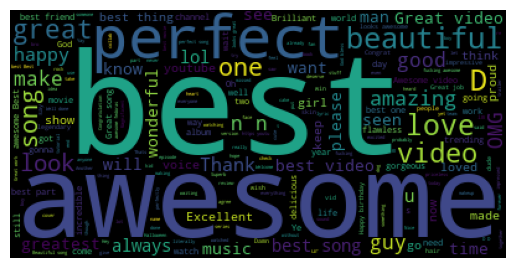

In [40]:
plt.imshow(wordcloud)
plt.axis('off')

In [41]:
### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [42]:
' '.join(comments_negative['comment_text'])

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [43]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [44]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

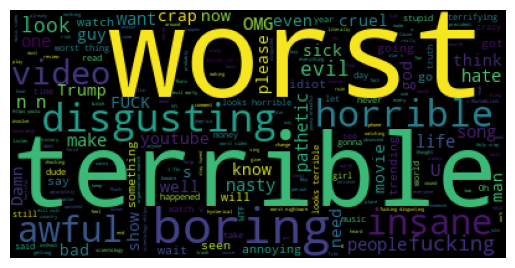

In [45]:
plt.imshow(wordcloud2)
plt.axis('off')

In [46]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

## 4. Perform Emoji's Analysis

In [47]:
!pip install emoji==2.8.0

In [48]:
import emoji

In [49]:
comments['comment_text'].head(10)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
9    You and your shit brother may have single hand...
Name: comment_text, dtype: object

In [50]:
### lets extract emoji from below comment

In [51]:
comment = 'trending 😉'

In [52]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [53]:
## lets try to write above code in a more simpler & readable way :

In [54]:
#simple code
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [55]:
emoji_list

['😉']

In [56]:
all_emojis_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [57]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [58]:
### NOw we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [59]:
from collections import Counter

In [60]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [61]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [62]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [63]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [64]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [65]:
Counter(all_emojis_list).most_common(10)[3][0]

'🔥'

In [66]:
[Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [67]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [68]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [69]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [70]:
pip install plotly==5.17.0

Note: you may need to restart the kernel to use updated packages.


In [71]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [72]:
trace = go.Bar(x=emojis , y=freqs)

In [73]:
iplot([trace])

In [74]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

## 5. Collect Entire data of Youtube

In [75]:
import os

In [76]:
files = os.listdir(r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study\additional_data')

In [77]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [78]:
## extracting csv files only from above list ..
files_csv = [file for file in files if '.csv' in file]

In [79]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [80]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [81]:
full_df = pd.DataFrame()
path = r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study\additional_data'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , on_bad_lines="skip")
    
    full_df = pd.concat([full_df , current_df] , ignore_index=True)
    

In [82]:
full_df.shape

(375942, 16)

## 6. Export data into (csv, json, db)

In [83]:
### upto some extent your data is cleaned , so lets export this data into various formats for further analysis :

In [84]:
'''

export your data into :
    a) csv 
    b) json
    c) db


'''

'\n\nexport your data into :\n    a) csv \n    b) json\n    c) db\n\n\n'

In [85]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [86]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [87]:
'''
default value of keep='first'

It means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.


keep='first' (default): mark all rows as duplicates except for the first occurrence.

keep='last': mark all rows as duplicates except for the last occurrence.

keep=False: mark all rows as all duplicates.


'''

"\ndefault value of keep='first'\n\nIt means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.\n\n\nkeep='first' (default): mark all rows as duplicates except for the first occurrence.\n\nkeep='last': mark all rows as duplicates except for the last occurrence.\n\nkeep=False: mark all rows as all duplicates.\n\n\n"

In [88]:
full_df = full_df.drop_duplicates()

In [89]:
full_df.shape

(339525, 16)

## a... Storing data into csv ..

In [90]:
full_df[0:1000].to_csv(r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study\data_export/youtube_sample.csv' , index=False)

## b... Storing data into json

In [91]:
full_df[0:1000].to_json(r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study\data_export/youtube_sample.json')

## c... Storing data into database

In [92]:
## create an engine that allows to connect db

In [93]:
from sqlalchemy import create_engine

In [94]:
# Lets create sql_alchemy engine by using create_engine method ie create engine allows us to connect to database

In [95]:
engine = create_engine(r'sqlite:///C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study\data_export/youtube_sample.sqlite')

In [96]:
### we will store first 1000 rows into Users table..
full_df[0:1000].to_sql('Users' , con=engine, if_exists='append')

1000

In [97]:
## As soon as u have u have your data into 'youtube_sample.sqlite' which has table has 'Users', now u can read data from this db file 'youtube_whole_data.sqlite' using sqlite3 & pandas

## 7. which category has maximum likes?

In [98]:
full_df.head(10)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   
5  0yIWz1XEeyc      17.14.11   
6  _uM5kFfkhB8      17.14.11   
7  2kyS6SvSYSE      17.14.11   
8  JzCsM1vtn78      17.14.11   
9  43sm-QwLcx4      17.14.11   

                                               title     channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©        EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                           I Dare You: GOING BALD!?          nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
5  Jake Paul Says Alissa Violet CHEATED with LOGA...        DramaAlert   
6             Vanoss Superhero School - New Students      VanossGaming   
7                 WE WANT TO TALK ABOUT OUR MARRIAGE      CaseyNeistat   
8               THE LOGANG MADE HISTORY. LOL. AGAIN.  Logan Paul Vlogs   
9  Finally Sheldon is winning an argument about t...       Sheikh Musa   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   
5           25  2017-11-13T07:37:51.000Z   
6           23  2017-11-12T23:52:13.000Z   
7           22  2017-11-13T17:13:01.000Z   
8           24  2017-11-12T20:19:24.000Z   
9           22  2017-11-10T14:10:46.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
5  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...   1309699   103755   
6  Funny Moments|"Montage video games"|"gaming"|"...   2987945   187464   
7                                    SHANtell martin    748374    57534   
8  logan paul vlog|"logan paul"|"logan"|"paul"|"o...   4477587   292837   
9               God|"Sheldon Cooper"|"Young Sheldon"    505161     4135   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
5      4613          12143  https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg   
6      9850          26629  https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg   
7      2967          15959  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
8      4123          36391  https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg   
9       976           1484  https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   
6              False             False                   False   
7              False             False                   False   
8              False             False                   False   
9       

In [99]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [100]:
## lets read json file ..
json_df = pd.read_json(r'C:\Users\User\Downloads\Portfolio Data Analyst projects\Youtube Case Study\additional_data/US_category_id.json')

In [101]:
json_df

kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [102]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [103]:
json_df['items'][0]

### each row of 'Items' feature is dictionary ..

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [104]:
json_df['items'][3]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
 'id': '15',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Pets & Animals',
  'assignable': True}}

In [105]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']
    
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)


In [106]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [107]:
full_df['category_id'].map(cat_dict)

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_id, Length: 339525, dtype: object

In [108]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [109]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...         Music  
1  STill got a lot of packages. Probably will las...        Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...        Comedy

<Axes: xlabel='category_name', ylabel='likes'>

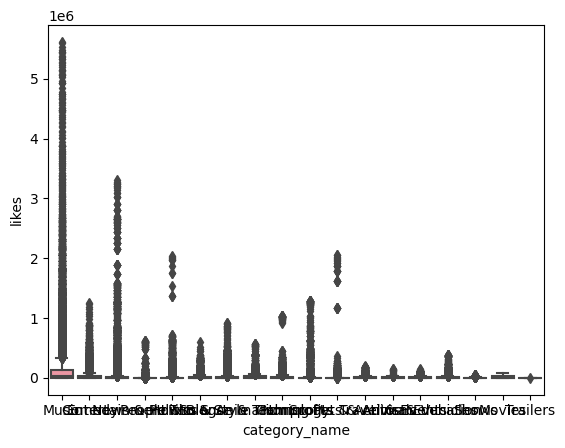

In [110]:
sns.boxplot(x='category_name', y='likes', data=full_df)

<Axes: xlabel='category_name', ylabel='likes'>

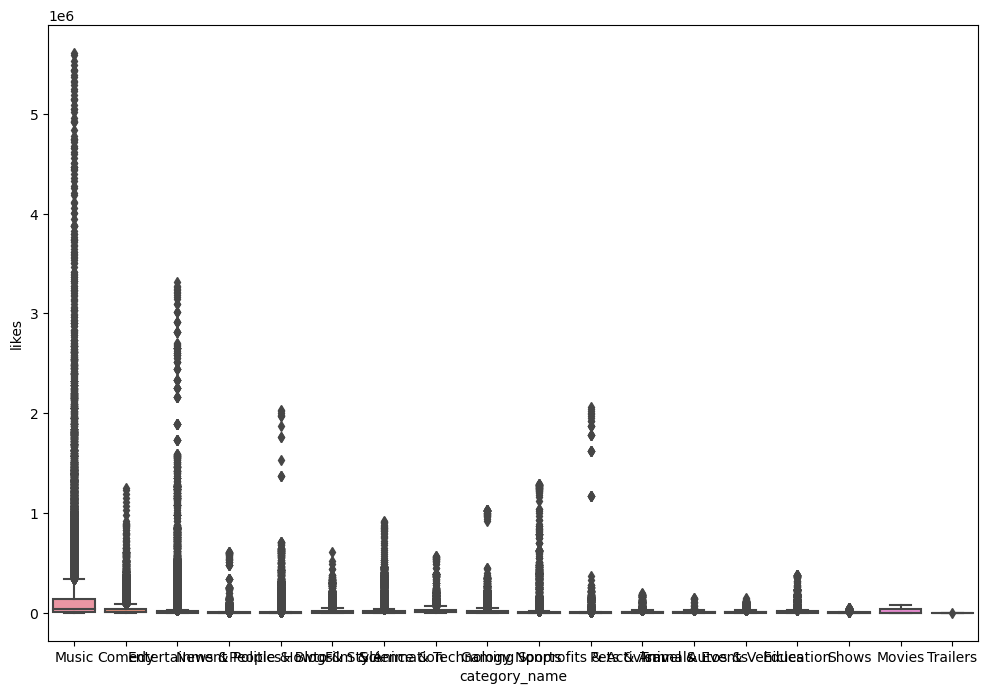

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

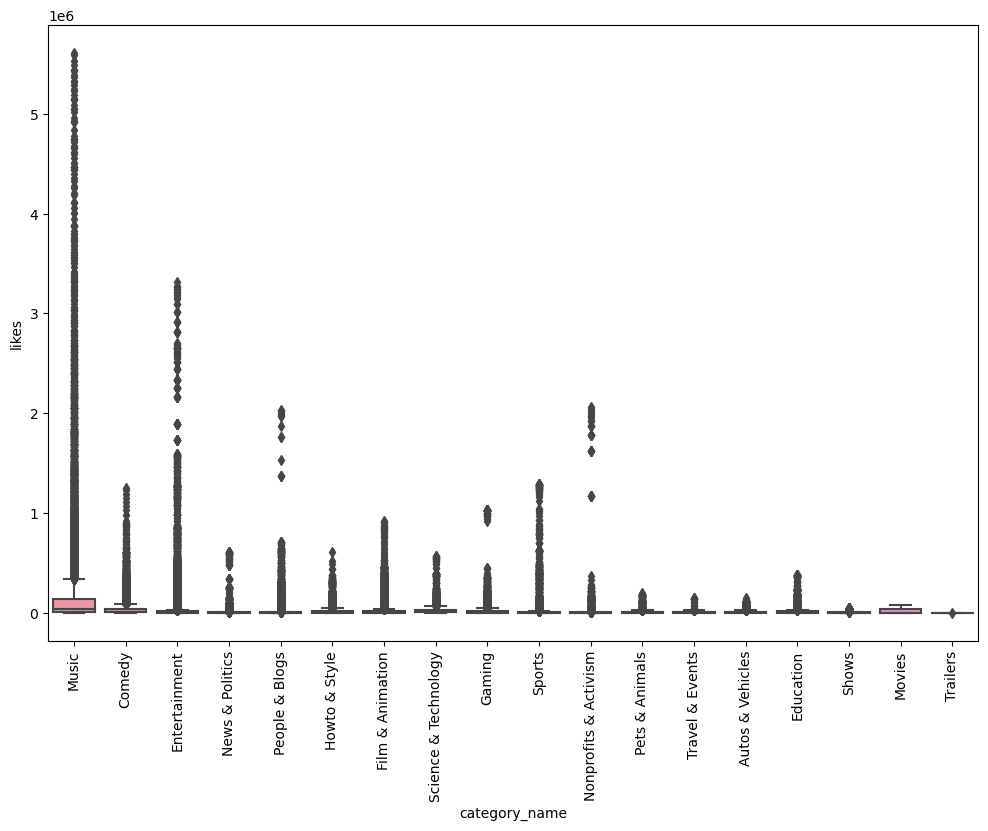

In [112]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

## 8. Find out whether audience is engaged or not

In [113]:
full_df['likes']/full_df['views']

0         0.045891
1         0.125949
2         0.045758
3         0.063096
4         0.048746
            ...   
375936    0.078203
375938    0.056356
375939    0.045073
375940    0.034086
375941    0.034647
Length: 339525, dtype: float64

In [114]:
(full_df['likes']/full_df['views'])*100

0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
375936     7.820293
375938     5.635623
375939     4.507286
375940     3.408645
375941     3.464728
Length: 339525, dtype: float64

In [115]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [116]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

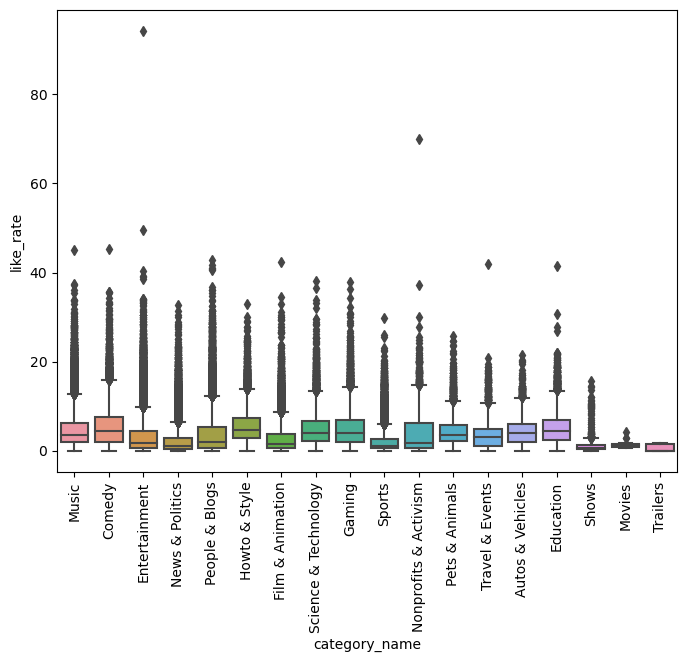

In [117]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
### analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

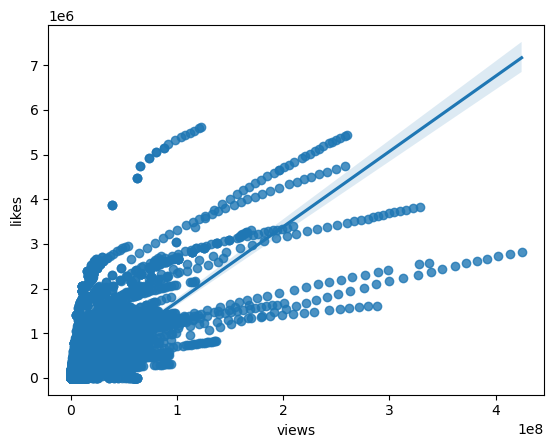

In [119]:
sns.regplot(x='views', y='likes', data = full_df)

In [120]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [121]:
full_df[['views', 'likes', 'dislikes']]

views    likes  dislikes
0       17158579   787425     43420
1        1014651   127794      1688
2        3191434   146035      5339
3        2095828   132239      1989
4       33523622  1634130     21082
...          ...      ...       ...
375936   8259128   645888      4052
375938   1064798    60008       382
375939   1066451    48068      1032
375940   5660813   192957      2846
375941  10306119   357079    212976

[339525 rows x 3 columns]

In [122]:
full_df[['views', 'likes', 'dislikes']].corr()

views     likes  dislikes
views     1.000000  0.779531  0.405428
likes     0.779531  1.000000  0.451809
dislikes  0.405428  0.451809  1.000000

<Axes: >

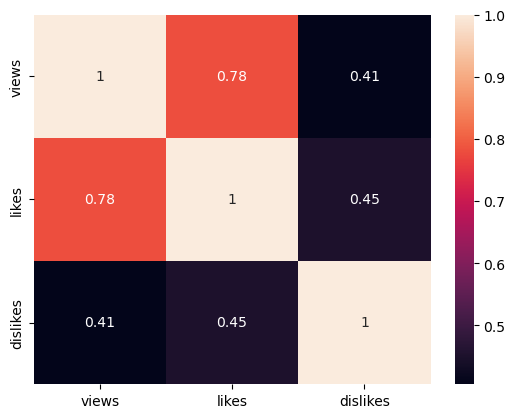

In [123]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

## 9. Which channels have the largest number of trending videos?

In [124]:
full_df.head(5)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...          Music   
1  STill got a lot of packages. Probably will las...         Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...         Comedy   
3  I know it's been a while since we did this sho...  Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...          Music   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  
3   6.309630      0.094903            0.835851  
4   4.874563      0.062887            0.253752

In [125]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [126]:
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [127]:
full_df.groupby(['channel_title']).size().sort_values()

channel_title
Sariel's LEGOÂ® Workshop                1
Happy Elements K.K                      1
Happy End                               1
Happy Life                              1
Happy Life Channel                      1
                                     ... 
Jimmy Kimmel Live                     528
TheEllenShow                          555
Late Night with Seth Meyers           592
WWE                                   643
The Late Show with Stephen Colbert    710
Length: 37824, dtype: int64

In [128]:
full_df.groupby(['channel_title']).size().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Kd Malts                                1
Zedan TV                                1
Kc Kelly - Rocketprenuer                1
Kbaby                                   1
Pavel Sidorik TV                        1
Length: 37824, dtype: int64

In [129]:
full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

channel_title    0
0      The Late Show with Stephen Colbert  710
1                                     WWE  643
2             Late Night with Seth Meyers  592
3                            TheEllenShow  555
4                       Jimmy Kimmel Live  528
...                                   ...  ...
37819                            Kd Malts    1
37820                            Zedan TV    1
37821            Kc Kelly - Rocketprenuer    1
37822                               Kbaby    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [130]:
### lets obtain above frequency table using groupby approach : 

In [131]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [132]:
cdf

channel_title    0
0      The Late Show with Stephen Colbert  710
1                                     WWE  643
2             Late Night with Seth Meyers  592
3                            TheEllenShow  555
4                       Jimmy Kimmel Live  528
...                                   ...  ...
37819                            Kd Malts    1
37820                            Zedan TV    1
37821            Kc Kelly - Rocketprenuer    1
37822                               Kbaby    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [133]:
cdf.rename(columns={0:'total_videos'})

channel_title  total_videos
0      The Late Show with Stephen Colbert           710
1                                     WWE           643
2             Late Night with Seth Meyers           592
3                            TheEllenShow           555
4                       Jimmy Kimmel Live           528
...                                   ...           ...
37819                            Kd Malts             1
37820                            Zedan TV             1
37821            Kc Kelly - Rocketprenuer             1
37822                               Kbaby             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [134]:
cdf = cdf.rename(columns={0:'total_videos'})

In [135]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           710
1                                     WWE           643
2             Late Night with Seth Meyers           592
3                            TheEllenShow           555
4                       Jimmy Kimmel Live           528
...                                   ...           ...
37819                            Kd Malts             1
37820                            Zedan TV             1
37821            Kc Kelly - Rocketprenuer             1
37822                               Kbaby             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [136]:
import plotly.express as px

In [137]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')

## 10.. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [138]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [139]:
import string

In [140]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [141]:
[char for char in full_df['title'][0] if char in string.punctuation]

['-', '(', ')', '.']

In [142]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [143]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [144]:
sample = full_df[0:10000]

In [145]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [146]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

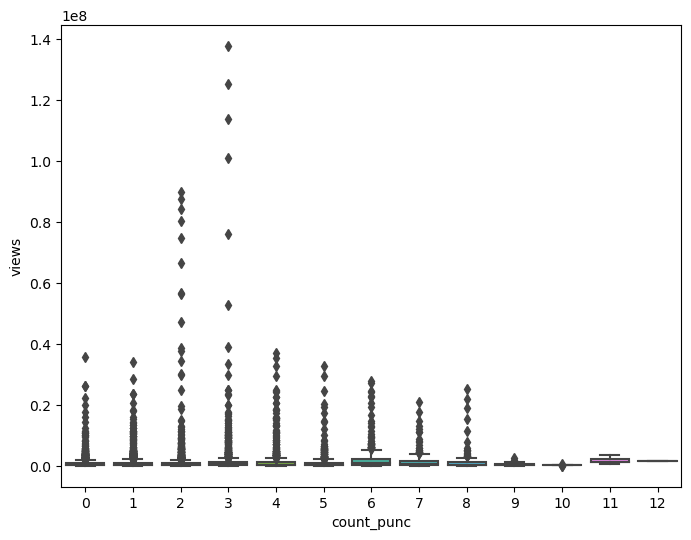

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='views', data=sample)
plt.show()

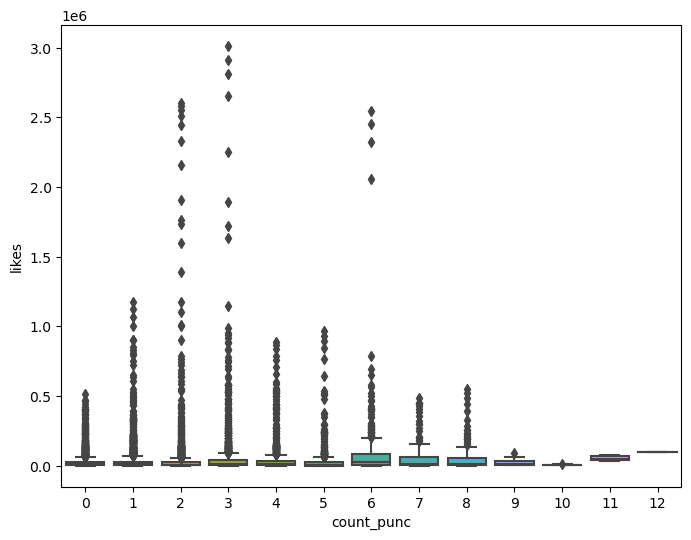

In [148]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='likes', data=sample)
plt.show()

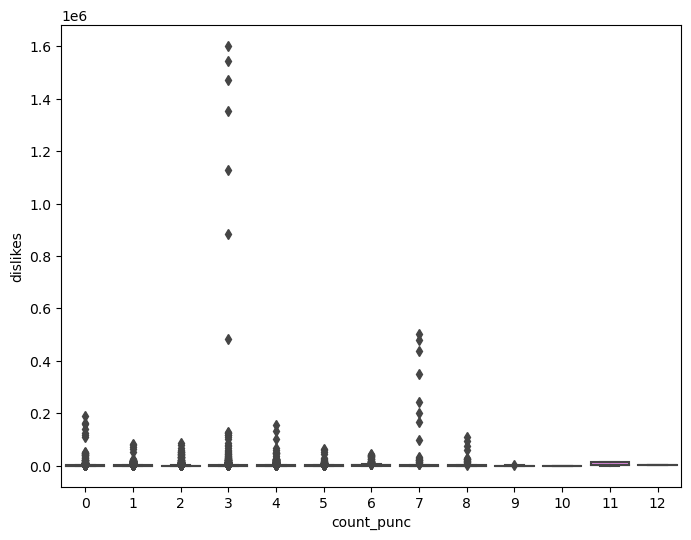

In [149]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='dislikes', data=sample)
plt.show()